In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import run_simple_energy_loss

In [3]:
simulation=run_simple_energy_loss.run_simulation

In [4]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [3, 5, 7] # p_T Observables we will use for the analysis

In [5]:
from emukit.core import ParameterSpace, ContinuousParameter

In [6]:
prior_ranges= {'alpha_s':(0.05,0.5), 'exponent_inel':(-3,3), 'exponent_el':(-3,3), 'scale_inel':(0.1, 0.5), 'scale_el':(0.1, 0.5)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}

In [7]:
# We will generate observable for these model parametr values and consider them as experimental data
# We will generate observables for these model parameter values and consider them as experimental data
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

Working on design 1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/integrate/_ode.py:1181: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/integrate/_ode.py:1181: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2b=scipy.integrate.quad(lambda u, p=p: p*integrand_middle(p,u), 0, delta, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2a=scipy.integrate.quad(vec_integrand, pmin, p, limit=npts, epsabs=epsabs, epsrel=epsrel)


Text(0.5, 1.0, 'Experimental observations')

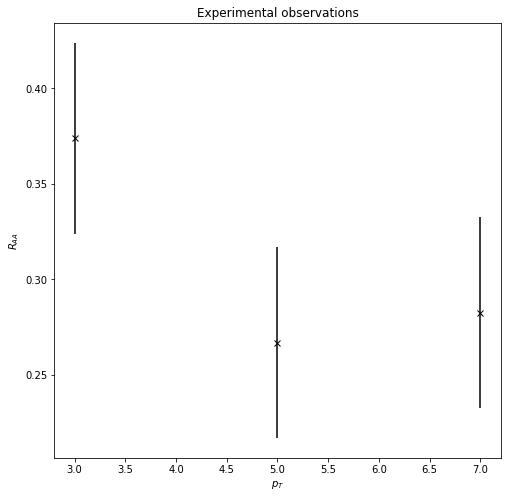

In [8]:
# Set seed for reproducibility.
seed = 42
np.random.seed(seed)

# Generate some synthetic data from the model.
x = np.array(pT_obs)
N = len(x)
obserr = 0.05 # Amplitude of noise term
obs = simulation(truth, *pT_range)[:,pT_obs] # True model
obs += obserr * np.random.randn(N) # Add some random noise

# Now plot it to see what the data looks like
fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar(x.flatten(), obs.flatten(), yerr=obserr, fmt="xk", capsize=0)
#ax.plot(x.flatten(), obs.flatten(), "k", alpha=0.3, lw=3)
#ax.set_xlim(0, 10)
ax.set_xlabel(r"$p_T$")
ax.set_ylabel(r"$R_{AA}$")
ax.set_title('Experimental observations')

In [10]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.05,0.5 ),
                                  ContinuousParameter('exponent_inel', -3, 3),
                                  ContinuousParameter('exponent_el', -3, 3),
                                  ContinuousParameter('scale_inel', 0.1, 0.5),
                                  ContinuousParameter('scale_el', 0.1, 0.5)])

In [11]:
from emukit.core.initial_designs import RandomDesign

design = RandomDesign(parameter_space)
num_data_points = 5
X = design.get_samples(num_data_points)
print(f'Shape of X {X.shape}')

Shape of X (5, 5)


In [12]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT]

def f1(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f2(design, pT=pT_obs[1]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f3(design, pT=pT_obs[2]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

fun=np.array([f1, f2, f3])

In [13]:
#Generate 5 random observables
Y = f(X,pT_obs)

[[ 0.12020839  1.24843547 -1.9090502   0.21649166  0.28242799]
 [ 0.12019753 -2.87649303 -1.89957294  0.34474116  0.41407038]
 [ 0.07613763  2.81945911 -1.17454654  0.15579754  0.17986951]
 [ 0.43977927  1.99465584  0.14853859  0.21685786  0.30569378]
 [ 0.32050176 -1.72596534 -0.40832989  0.24654474  0.33696583]]
Working on design 1
Working on design 2
Working on design 3
Working on design 4
Working on design 5


/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:42: RuntimeWarning: invalid value encountered in log
  log_P_g_prev=np.log(P_g)
/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:74: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p, pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:79: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p*(1+delta), pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/yiji/ALL_Python_Projects/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning

In [15]:
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from multiprocessing import Pool

### Let's build a emulator for each observable (3 in total) and query 5 points for each emulator at a time. Then train all 3 emulators on these new 5 points that we get in each iteration. 

In [30]:
pT_obs

[3, 5, 7]

In [16]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

gp_array = []
for i,pt in enumerate(pT_obs):
    rbf_kern =      RBF(  input_dim=5,
                          variance= 1,
                          lengthscale=ptp,
                          ARD=True)
    my_kernel = rbf_kern
    model_gpy = GPRegression(X=X,Y=Y[:, i].reshape(-1,1),kernel=my_kernel, noise_var=0.01**2)
    model_gpy.optimize_restarts(num_restarts = 30)
    model_emukit = GPyModelWrapper(model_gpy, n_restarts=30)
    gp_array.append(model_emukit)

Optimization restart 1/30, f = -0.517570421816393
Optimization restart 2/30, f = -0.5175747604149712
Optimization restart 3/30, f = -0.5175746063830977
Optimization restart 4/30, f = 0.2116361865511216
Optimization restart 5/30, f = 3.7854579870774465
Optimization restart 6/30, f = -0.5175580628978849
Optimization restart 7/30, f = -0.5175747161419957
Optimization restart 8/30, f = -0.5175747258556558
Optimization restart 9/30, f = -0.5175646946937569
Optimization restart 10/30, f = -0.517572795787645
Optimization restart 11/30, f = -0.5175746838216861
Optimization restart 12/30, f = 3.785458013298841
Optimization restart 13/30, f = 3.785457200859773
Optimization restart 14/30, f = -0.5175747586068393
Optimization restart 15/30, f = 0.2439208648515816
Optimization restart 16/30, f = -0.5175747629383332
Optimization restart 17/30, f = -0.5175747704436229
Optimization restart 18/30, f = 0.09529531154006454
Optimization restart 19/30, f = 0.24392091118951997
Optimization restart 20/30, f 

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply



Optimization restart 14/30, f = -0.4661199749129157
Optimization restart 15/30, f = -0.46606990856893526
Optimization restart 16/30, f = -0.46612012872900976
Optimization restart 17/30, f = -0.46612011138415
Optimization restart 18/30, f = 3.497640463387766
Optimization restart 19/30, f = -0.46611456220678793
Optimization restart 20/30, f = -0.4660823637671605
Optimization restart 21/30, f = -0.46611420459025865
Optimization restart 22/30, f = -0.1406160134376755
Optimization restart 23/30, f = -0.466120060058703
Optimization restart 24/30, f = -0.14061600124747287
Optimization restart 25/30, f = 3.4977667205524856
Optimization restart 26/30, f = -0.46612012289817395
Optimization restart 27/30, f = -0.4661198683205421
Optimization restart 28/30, f = -0.14061612819193137
Optimization restart 29/30, f = -0.46611819765024487
Optimization restart 30/30, f = 3.4977680675267644
Optimization restart 1/30, f = -0.44678043874928175
Optimization restart 2/30, f = -0.44677899706758817
Optimizati

In [17]:
# gp_array[1].predict(X[0,:].reshape(-1,5))

In [18]:
# from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design.acquisitions.contour_MultiObs import contourWeightedEI

In [19]:
a_list = [0.2, 0.5, 0.8]
alpha_list = [2, 2, 2]
w_list = [0.5, 0.3, 0.2]

In [20]:
contour_MD = contourWeightedEI(model_list = gp_array, a_list = a_list, alpha_list = alpha_list, w_list = w_list)

In [24]:
from emukit.experimental_design import ExperimentalDesignLoop_list
expdesign_loop = ExperimentalDesignLoop(model_list = gp_array, # 1. modify "experimental_design_loop.py"
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)

In [ ]:
max_iterations = 20
x_plot = np.linspace(0.2, 0.4,100).reshape(-1,1)

for i in range(0,max_iterations): # need to loop for multiple observables
    plt.figure(figsize=(12, 8))
    #fig,axs = plt.subplots(nrow=2, ncols=3)
    mu_plot, var_plot = model_emukit.predict(x_plot)
    mu_plot = mu_plot.reshape(-1,1)

    plt.plot(model_emukit.X, model_emukit.Y, "ro", markersize=10, label="Observations")
    plt.plot(x_plot, mu_plot, "C0", label="Model")
    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.6, label=r'$\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 20 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 20 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.4, label=r'$20\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 30 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 30 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.2, label=r'$30\sigma$')
    #plt.legend(loc='upper right', prop={'size': LEGEND_SIZE})
    plt.xlabel(r"$\alpha_s$", fontsize=15)
    plt.ylabel(r"$R_{AA}$" + ' at '+r"$p_T$"+'=5 GeV', fontsize=15)
    plt.grid(True)
    plt.savefig(f'figures/exp_design_ivr_{i}.png',dpi=50)
    plt.show()
    
    plt.figure(figsize=(12,8))
    aqu_values= contour_1D.evaluate(x=x_plot)
    plt.plot(x_plot, aqu_values)
    plt.xlabel(r"$\alpha_s$", fontsize=15)
    plt.ylabel('aqusition function values', fontsize=15)
    plt.grid(True)
    plt.show()
    ed=expdesign_loop.run_loop(f,1) # 2. to modify run_loop function in outer_loop.py